캐글 필사: https://www.kaggle.com/artgor/eda-basic-fe-and-lgb

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/eda-basic-fe-and-lgb/__results__.html
/kaggle/input/eda-basic-fe-and-lgb/sub.csv
/kaggle/input/eda-basic-fe-and-lgb/__output__.json
/kaggle/input/eda-basic-fe-and-lgb/custom.css
/kaggle/input/eda-basic-fe-and-lgb/__results___files/__results___65_0.png
/kaggle/input/eda-basic-fe-and-lgb/__results___files/__results___61_0.png
/kaggle/input/eda-basic-fe-and-lgb/__results___files/__results___60_0.png
/kaggle/input/eda-basic-fe-and-lgb/__results___files/__results___53_0.png
/kaggle/input/eda-basic-fe-and-lgb/__results___files/__results___86_1.png
/kaggle/input/eda-basic-fe-and-lgb/__results___files/__results___40_1.png
/kaggle/input/eda-basic-fe-and-lgb/__results___files/__results___58_0.png
/kaggle/input/eda-basic-fe-and-lgb/__results___files/__results___46_0.png
/kaggle/input/eda-basic-fe-and-lgb/__results___files/__results___54_0.png
/kaggle/input/eda-basic-fe-and-lgb/__results___files/__results___57_0.png
/kaggle/input/eda-basic-fe-and-lgb/__results___files/__results___68_

# Home credit  Defalut Risk
This is kernel will contain EDA, visualization, feature engineering and some modelling. Work currently in progress.

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns

import datetime
import lightgbm as lgb
from scipy import stats
from scipy.sparse import hstack,csr_matrix
from sklearn.model_selection import train_test_split, StratifiedKFold
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
import os
import xgboost as xgb
import lightgbm as lgb

import os
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('max_columns', 150)

There are several files with data, let's go through them step by step.

In [8]:
folder = '../input/home-credit-default-risk/'
application_train = pd.read_csv(os.path.join(folder, 'application_train.csv'))
application_test = pd.read_csv(os.path.join(folder, 'application_test.csv'))
bureau = pd.read_csv(os.path.join(folder, 'bureau.csv'))
bureau_balance = pd.read_csv(os.path.join(folder, 'bureau_balance.csv'))
POS_CASH_balance = pd.read_csv(os.path.join(folder, 'POS_CASH_balance.csv'))
credit_card_balance = pd.read_csv(os.path.join(folder, 'credit_card_balance.csv'))
previous_application = pd.read_csv(os.path.join(folder, 'previous_application.csv'))
installments_payments = pd.read_csv(os.path.join(folder, 'installments_payments.csv'))
sample_submission = pd.read_csv(os.path.join(folder, 'sample_submission.csv'))

# Data Exploration

**application_train and application_test**

These are main files with data and technically we can use only them to make predictions. Obviously using additional data is necessary to improve score.

In [9]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

We have 122 columns in just main file! Let's take a look on some of them.

**Catrgorical features**

*Target*

In [11]:
application_train.TARGET.value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

We have disbalaned target, though disbalance isn't really serious.

*NAME_CONTRACT_TYPE*

In [12]:
pd.crosstab(application_train.TARGET, application_train.NAME_CONTRACT_TYPE, dropna=False, normalize='all')

NAME_CONTRACT_TYPE,Cash loans,Revolving loans
TARGET,,
0,0.829274,0.089997
1,0.075513,0.005216


We can see that there are two types of contract - cash loans and revolving loans. Most of the loans are cash loans which are defaulted.

*CODE_GENDER*

In [13]:
pd.crosstab(application_train.TARGET, application_train.CODE_GENDER, dropna=False)

CODE_GENDER,F,M,XNA
TARGET,,,
0,188278,94404,4
1,14170,10655,0


We can see that women take more loans and higher percentage of them repays the loans. And there are 4 people with unindentified gender, who repayed their loans :)

*FLAG_OWN_CAR and FLAG_OWN_REALTY*

In [14]:
print('There are {0} people with realty. {1}% of them repay loans.'.format(application_train[application_train.FLAG_OWN_REALTY == 'Y'].shape[0], np.round(application_train[application_train.FLAG_OWN_REALTY == 'Y'].TARGET.value_counts(normalize=True).values[1], 3) * 100))
print('There are {0} people with cars. {1}% of them repay loans.'.format(application_train[application_train.FLAG_OWN_CAR == 'Y'].shape[0], np.round(application_train[application_train.FLAG_OWN_CAR == 'Y'].TARGET.value_counts(normalize=True).values[1], 4) * 100))
print('Average age of the car is {:.2f} years.'.format(application_train.groupby(['FLAG_OWN_CAR'])['OWN_CAR_AGE'].mean().values[1]))

There are 213312 people with realty. 8.0% of them repay loans.
There are 104587 people with cars. 7.24% of them repay loans.
Average age of the car is 12.06 years.


*CNT_CHILDREN and NAME_FAMILY_STATUS*

In [16]:
pd.crosstab(application_train.CNT_CHILDREN, application_train.NAME_FAMILY_STATUS, dropna=False)

NAME_FAMILY_STATUS,Civil marriage,Married,Separated,Single / not married,Unknown,Widow
CNT_CHILDREN,,,,,,
0,20947,126575,14132,38810,2,14905
1,6588,43696,4389,5578,0,868
2,1936,22496,1111,958,0,248
3,262,3190,122,85,0,58
4,33,370,12,9,0,5
5,5,74,2,1,0,2
6,2,17,1,0,0,1
7,1,5,0,0,0,1
8,0,2,0,0,0,0


We can see that most of the people are married and have zero children. In face we can divide people into two group based on their famliy status - living together with their partner or single.

In [17]:
pd.crosstab(application_train.CNT_CHILDREN, application_train.CNT_FAM_MEMBERS, dropna=False)

CNT_FAM_MEMBERS,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,20.0
CNT_CHILDREN,,,,,,,,,,,,,,,,,
0,67847,147522,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,10835,50284,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,2317,24432,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,265,3452,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,26,403,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,5,79,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,2,19,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,6,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0


It isn't surprising that there are a lot of families consisting of two or one adults. Also there are families with two adults and 1-2 children. 

*NAME_TYPE_SUITE*

This feature shows who was accompanying client when he was applying for the loan.

In [20]:
application_train['NAME_TYPE_SUITE'].value_counts(dropna=False)

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
NaN                  1292
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [22]:
pd.crosstab(application_train.NAME_TYPE_SUITE, application_train.NAME_FAMILY_STATUS, dropna=False)

NAME_FAMILY_STATUS,Civil marriage,Married,Separated,Single / not married,Unknown,Widow
NAME_TYPE_SUITE,,,,,,
Children,253,1940,318,378,0,378
Family,3702,28617,1747,4150,0,1933
Group of people,29,165,20,44,0,13
Other_A,147,340,70,268,0,41
Other_B,171,854,132,486,0,127
"Spouse, partner",1247,9685,74,345,0,19
Unaccompanied,24112,154047,17334,39529,0,13504


It is interesting to see that these two variables sometimes contradict each other. For example, separated, single or widowed applicants were sometimes accompanied by their partner. I suppose this means unofficial relationships? Also sometimes children accompanied the applicant. Maybe these were adult childred?

*NAME_INCOME_TYPE*

In [24]:
application_train.groupby(['NAME_INCOME_TYPE']).agg({'AMT_INCOME_TOTAL' : ['mean', 'median','count']})

AMT_INCOME_TOTAL                  
                                 mean    median   count
NAME_INCOME_TYPE                                       
Businessman             652500.000000  495000.0      10
Commercial associate    202955.327289  180000.0   71617
Maternity leave         140400.000000   90000.0       5
Pensioner               136401.292273  117000.0   55362
State servant           179737.969506  157500.0   21703
Student                 170500.000000  157500.0      18
Unemployed              110536.363636   78750.0      22
Working                 163169.889223  135000.0  158774

In [25]:
application_train[application_train['NAME_INCOME_TYPE'] == 'Maternity leave']['CODE_GENDER'].value_counts()

F    4
M    1
Name: CODE_GENDER, dtype: int64

We can see that there are 4 categories with little amount of people in them: several high-income businessmen, 4 women and 1 man on maternity leave, and some unemployed/students. It is quite interesting that unemployed/students have quite a high income. And of course, most of the people work.

In [26]:
s = pd.crosstab(application_train.NAME_INCOME_TYPE, application_train.OCCUPATION_TYPE, dropna=False).style.background_gradient(cmap='viridis', low=.5, high=0).highlight_null('red')
s

OCCUPATION_TYPE,Accountants,Cleaning staff,Cooking staff,Core staff,Drivers,HR staff,High skill tech staff,IT staff,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
NAME_INCOME_TYPE,,,,,,,,,,,,,,,,,,
Businessman,0,0,0,1,0,0,0,0,0,0,7,0,0,0,0,0,0,0
Commercial associate,3970,892,1305,6528,4916,220,3495,204,12763,370,8916,1036,989,324,11104,343,1559,386
Maternity leave,1,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0
Pensioner,0,2,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
State servant,729,261,453,6956,815,64,1033,55,1868,25,2142,2585,38,9,186,264,380,53
Student,1,0,0,3,1,0,0,0,5,2,0,0,0,0,0,0,0,1
Working,5112,3498,4188,14080,12871,279,6852,267,40548,1696,10306,4915,1625,418,20811,698,4782,908


*AMT_GOODS_PRICE*

For consumer loans it is the price of the goods for which the loan is given

In [27]:
print('{0} zero values.'.format(application_train[application_train['AMT_GOODS_PRICE'].isnull()].shape[0]))

278 zero values.


So this means  that only 278 loans have some other type. Let's do deeper.

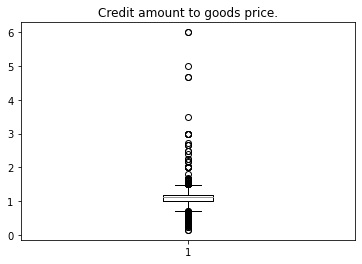

In [28]:
non_zero_good_price = application_train[application_train['AMT_GOODS_PRICE'].isnull() == False]
credit_to_good_price = non_zero_good_price['AMT_CREDIT'] / non_zero_good_price['AMT_GOODS_PRICE']
plt.boxplot(credit_to_good_price);
plt.title('Credit amount to goods price.');

We can see that most of the loans have the amount which is similar to the goods price, but there are some outliers.

*NAME_HOUSING_TYPE*

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Counts of housing type')

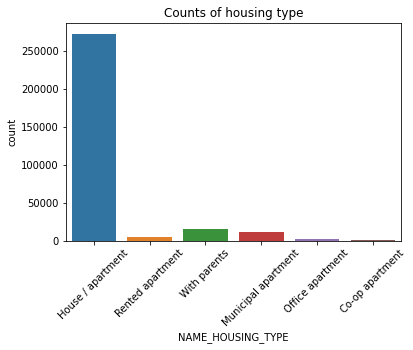

In [29]:
sns.countplot(application_train['NAME_HOUSING_TYPE']);
plt.xticks(rotation=45);
plt.title('Counts of housing type')

**Contact information**

There are 6 features showing that client provided some contact information, let's see how many ways of contact clients usually provide.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


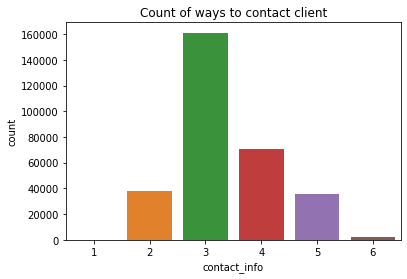

In [30]:
application_train['contact_info'] = application_train['FLAG_MOBIL'] + application_train['FLAG_EMP_PHONE'] + application_train['FLAG_WORK_PHONE'] + application_train['FLAG_CONT_MOBILE'] + application_train['FLAG_PHONE'] + application_train['FLAG_EMAIL']
sns.countplot(application_train['contact_info']);
plt.title('Count of ways to contact client');

Most clients provide 3 ways to contact them and usually minimus is 2, if we don't consider several people who left only 1.

# deliquencies

It is very important to see how many times clients was late with payments or defaulted his loans. I suppose info about his social circle is also important. I'll divide values into 2 groups: 0, 1 and more than 1.

In [39]:
application_train.loc[application_train['OBS_30_CNT_SOCIAL_CIRCLE'] > 1, 'OBS_30_CNT_SOCIAL_CIRCLE'] = '1+';
application_train.loc[application_train['DEF_30_CNT_SOCIAL_CIRCLE'] > 1, 'DEF_30_CNT_SOCIAL_CIRCLE'] = '1+';
application_train.loc[application_train['OBS_60_CNT_SOCIAL_CIRCLE'] > 1, 'OBS_60_CNT_SOCIAL_CIRCLE'] = '1+';
application_train.loc[application_train['DEF_60_CNT_SOCIAL_CIRCLE'] > 1, 'DEF_60_CNT_SOCIAL_CIRCLE'] = '1+';

TypeError: '>' not supported between instances of 'str' and 'int'

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

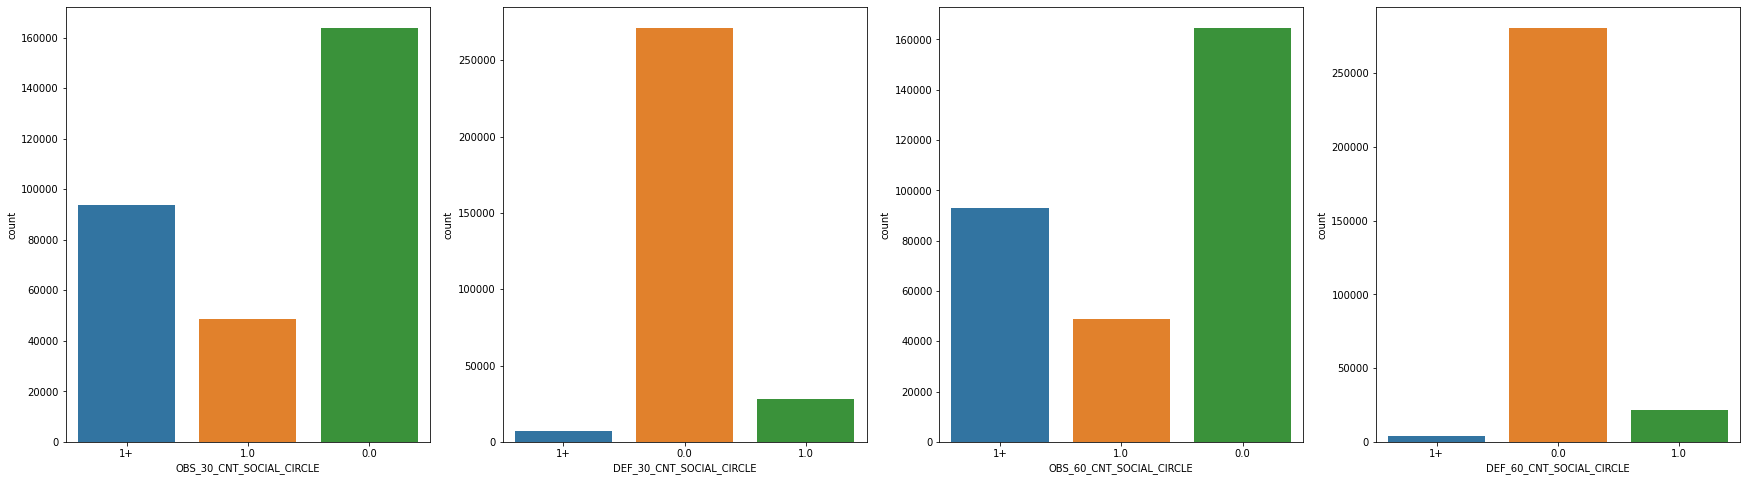

In [35]:
fig, ax = plt.subplots(figsize = (30, 8))
plt.subplot(1, 4, 1)
sns.countplot(application_train['OBS_30_CNT_SOCIAL_CIRCLE']);
plt.subplot(1, 4, 2)
sns.countplot(application_train['DEF_30_CNT_SOCIAL_CIRCLE']);
plt.subplot(1, 4, 3)
sns.countplot(application_train['OBS_60_CNT_SOCIAL_CIRCLE']);
plt.subplot(1, 4, 4)
sns.countplot(application_train['DEF_60_CNT_SOCIAL_CIRCLE']);

**Continuous variables**

*AMT_INCOME_TOTAL*

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


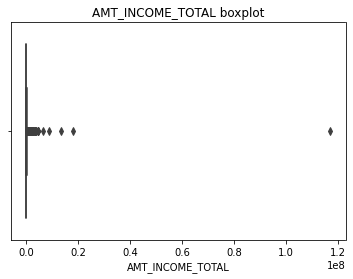

In [40]:
sns.boxplot(application_train['AMT_INCOME_TOTAL']);
plt.title('AMT_INCOME_TOTAL boxplot');

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


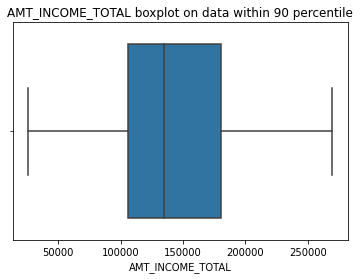

In [41]:
sns.boxplot(application_train[application_train['AMT_INCOME_TOTAL'] < np.percentile(application_train['AMT_INCOME_TOTAL'], 90)]['AMT_INCOME_TOTAL']);
plt.title('AMT_INCOME_TOTAL boxplot on data within 90 percentile');

In [42]:
application_train.groupby('TARGET').agg({'AMT_INCOME_TOTAL': ['mean', 'median', 'count']})

AMT_INCOME_TOTAL                  
                   mean    median   count
TARGET                                   
0         169077.722266  148500.0  282686
1         165611.760906  135000.0   24825

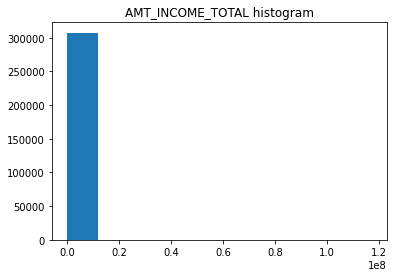

In [43]:
plt.hist(application_train['AMT_INCOME_TOTAL']);
plt.title('AMT_INCOME_TOTAL histogram');

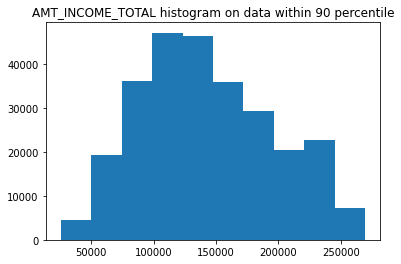

In [44]:
plt.hist(application_train[application_train['AMT_INCOME_TOTAL'] < np.percentile(application_train['AMT_INCOME_TOTAL'], 90)]['AMT_INCOME_TOTAL']);
plt.title('AMT_INCOME_TOTAL histogram on data within 90 percentile');

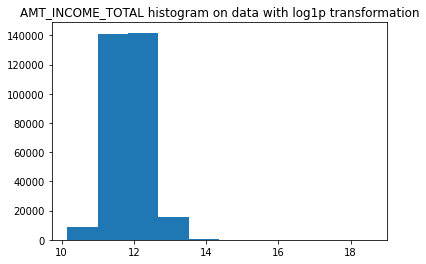

In [45]:
plt.hist(np.log1p(application_train['AMT_INCOME_TOTAL']));
plt.title('AMT_INCOME_TOTAL histogram on data with log1p transformation');

We can see following things from the information above:

- income feature has some huge outliers. This could be due to rich individuals or due to errors in data;
- average income is almost similar for those who repay the loans and those who don't;
- if we leave only data within 90 percentile, it is almost normally distributed;
- log transformation also helps;

*AMT_CREDIT*

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


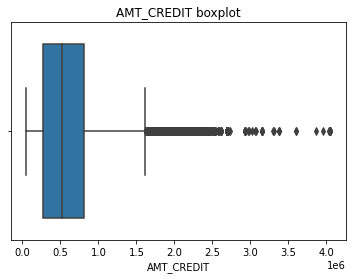

In [52]:
sns.boxplot(application_train['AMT_CREDIT'], orient='v');
plt.title('AMT_CREDIT boxplot');

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


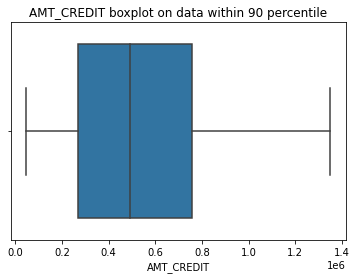

In [53]:
sns.boxplot(application_train[application_train['AMT_CREDIT'] < np.percentile(application_train['AMT_CREDIT'], 95)]['AMT_CREDIT'], orient='v');
plt.title('AMT_CREDIT boxplot on data within 90 percentile');

In [54]:
application_train.groupby('TARGET').agg({'AMT_CREDIT': ['mean', 'median', 'count']})

AMT_CREDIT                  
                 mean    median   count
TARGET                                 
0       602648.282002  517788.0  282686
1       557778.527674  497520.0   24825

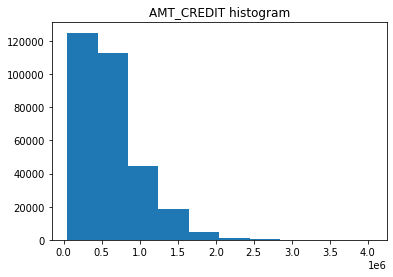

In [55]:
plt.hist(application_train['AMT_CREDIT']);
plt.title('AMT_CREDIT histogram');

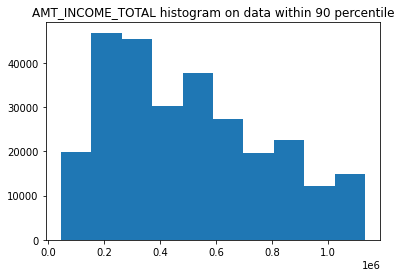

In [56]:
plt.hist(application_train[application_train['AMT_CREDIT'] < np.percentile(application_train['AMT_CREDIT'], 90)]['AMT_CREDIT']);
plt.title('AMT_INCOME_TOTAL histogram on data within 90 percentile');

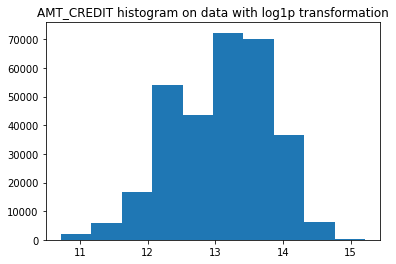

In [57]:
plt.hist(np.log1p(application_train['AMT_CREDIT']));
plt.title('AMT_CREDIT histogram on data with log1p transformation');

This feature shows the amount of the loan in question. We can see following things from the information above:

- income feature has some outliers. Maybe mortgage?;
- average credit amoint is almost similar for those who repay the loans and those who don't;
- if we leave only data within 95 percentile, it is almost normally distributed;
- log transformation also helps;

*DAYS_BIRTH*

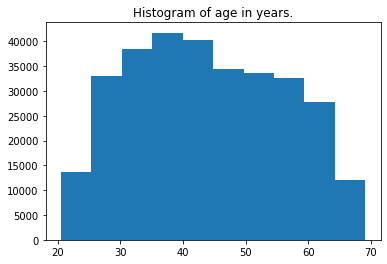

In [58]:
application_train['age'] = application_train['DAYS_BIRTH'] / -365
plt.hist(application_train['age']);
plt.title('Histogram of age in years.');

We can see that age distribution is almost normal and most of the people are between 30 and 40 years.

*DAYS_EMPLOYED*

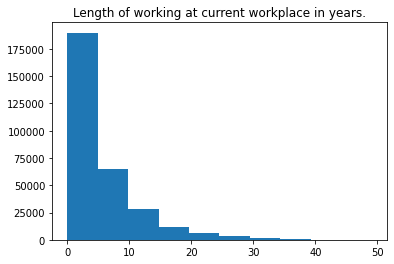

In [59]:
application_train.loc[application_train['DAYS_EMPLOYED'] == 365243, 'DAYS_EMPLOYED'] = 0
application_train['years_employed'] = application_train['DAYS_EMPLOYED'] / -365
plt.hist(application_train['years_employed']);
plt.title('Length of working at current workplace in years.');

Ther was a strange value - 365243, it could mean empty values or some errors, so I replace it with zero. A lot of people don't work, but let's look deeper into this.

In [60]:
application_train.groupby(['NAME_INCOME_TYPE']).agg({'years_employed': ['mean', 'median', 'count', 'max'], 'age': ['median']})

years_employed                                     age
                               mean    median   count        max     median
NAME_INCOME_TYPE                                                           
Businessman                7.874795  6.280822      10  14.917808  47.498630
Commercial associate       5.833627  4.147945   71617  48.071233  39.780822
Maternity leave            7.224110  8.273973       5  10.306849  39.350685
Pensioner                  0.002448 -0.000000   55362  35.246575  60.413699
State servant              9.454441  7.205479   21703  48.172603  40.693151
Student                    6.835160  5.069863      18  21.931507  36.663014
Unemployed                 0.000000 -0.000000      22  -0.000000  45.860274
Working                    6.446909  4.427397  158774  49.073973  39.876712

Well, it seems that a lot of non-working people are pensioners, which is normal. As for working people - they seem to work for several years at one place.

Ther are so many features and so many possible angles from which we can analyze them. Let's see this for example:

In [61]:
application_train.groupby(['NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE']).agg({'AMT_INCOME_TOTAL': ['mean', 'median', 'count', 'max']})

AMT_INCOME_TOTAL  \
                                                               mean   
NAME_EDUCATION_TYPE           NAME_INCOME_TYPE                        
Academic degree               Commercial associate    274688.372093   
                              Pensioner               203919.230769   
                              State servant           258847.826087   
                              Working                 226312.500000   
Higher education              Businessman             652500.000000   
                              Commercial associate    242283.998486   
                              Maternity leave         195000.000000   
                              Pensioner               171455.114974   
                              State servant           207116.161080   
                              Student                 231000.000000   
                              Unemployed              189000.000000   
                              Working                 194013.110125   
Incomplete higher             Commercial associate    206232.296029   
                              Pensioner               149437.155405   
                              State servant           173589.989610   
                              Student                 157500.000000   
                              Unemployed              126000.000000   
                              Working                 170659.490600   
Lower secondary               Commercial associate    168173.628261   
                              Pensioner               106468.010464   
                              State servant           143250.000000   
                              Working                 140070.652174   
Secondary / secondary special Commercial associate    181368.704601   
                              Maternity leave          58500.000000   
                              Pensioner               130863.482560   
                              State servant           159979.349061   
                              Student                 138681.818182   
                              Unemployed               70753.846154   
                              Working                 154261.801730   

                                                                       \
                                                       median   count   
NAME_EDUCATION_TYPE           NAME_INCOME_TYPE                          
Academic degree               Commercial associate  247500.00      43   
                              Pensioner             155700.00      26   
                              State servant         225000.00      23   
                              Working               202500.00      72   
Higher education              Businessman           495000.00      10   
                              Commercial associate  202500.00   24025   
                              Maternity leave       135000.00       3   
                              Pensioner             148500.00    8188   
                              State servant         180000.00    8863   
                              Student               175500.00       6   
                              Unemployed            180000.00       6   
                              Working               174134.25   33762   
Incomplete higher             Commercial associate  180000.00    3400   
                              Pensioner             135000.00     518   
                              State servant         157500.00     770   
                              Student               157500.00       1   
                              Unemployed             63000.00       3   
                              Working               157500.00    5585   
Lower secondary               Commercial associate  144000.00     460   
                              Pensioner              90000.00    1529   
                              State servant         119250.00     102   
                          

We can see that most of the loans are taken by working people with secondary education.

**Transforming and merging data**

In [62]:
application_train['AMT_INCOME_TOTAL'] = np.log1p(application_train['AMT_INCOME_TOTAL'])
application_train['AMT_CREDIT'] = np.log1p(application_train['AMT_CREDIT'])
application_train['OWN_CAR_AGE'] = application_train['OWN_CAR_AGE'].fillna(0)
application_train['app AMT_CREDIT / AMT_ANNUITY'] = application_train['AMT_CREDIT'] / application_train['AMT_ANNUITY']
application_train['app EXT_SOURCE mean'] = application_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis = 1)
application_train['app EXT_SOURCE_1 / DAYS_BIRTH'] = application_train['EXT_SOURCE_1'] / application_train['DAYS_BIRTH']
application_train['app AMT_INCOME_TOTAL / 12 - AMT_ANNUITY'] = application_train['AMT_INCOME_TOTAL'] / 12. - application_train['AMT_ANNUITY']
application_train['app AMT_INCOME_TOTAL / AMT_ANNUITY'] = application_train['AMT_INCOME_TOTAL'] / application_train['AMT_ANNUITY']
application_train['app AMT_INCOME_TOTAL - AMT_GOODS_PRICE'] = application_train['AMT_INCOME_TOTAL'] - application_train['AMT_GOODS_PRICE']

In [63]:
application_test.loc[application_test['OBS_30_CNT_SOCIAL_CIRCLE'] > 1, 'OBS_30_CNT_SOCIAL_CIRCLE'] = '1+'
application_test.loc[application_test['DEF_30_CNT_SOCIAL_CIRCLE'] > 1, 'DEF_30_CNT_SOCIAL_CIRCLE'] = '1+'
application_test.loc[application_test['OBS_60_CNT_SOCIAL_CIRCLE'] > 1, 'OBS_60_CNT_SOCIAL_CIRCLE'] = '1+'
application_test.loc[application_test['DEF_60_CNT_SOCIAL_CIRCLE'] > 1, 'DEF_60_CNT_SOCIAL_CIRCLE'] = '1+'
np.log1p(application_test['AMT_INCOME_TOTAL'])
np.log1p(application_test['AMT_CREDIT'])
application_test['age'] = application_test['DAYS_BIRTH'] / -365
application_test.loc[application_test['DAYS_EMPLOYED'] == 365243, 'DAYS_EMPLOYED'] = 0
application_test['years_employed'] = application_test['DAYS_EMPLOYED'] / -365
application_test['AMT_INCOME_TOTAL'] = np.log1p(application_test['AMT_INCOME_TOTAL'])
application_test['AMT_CREDIT'] = np.log1p(application_test['AMT_CREDIT'])
application_test['OWN_CAR_AGE'] = application_test['OWN_CAR_AGE'].fillna(0)
application_test['app AMT_CREDIT / AMT_ANNUITY'] = application_test['AMT_CREDIT'] / application_test['AMT_ANNUITY']
application_test['app EXT_SOURCE mean'] = application_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis = 1)
application_test['app EXT_SOURCE_1 / DAYS_BIRTH'] = application_test['EXT_SOURCE_1'] / application_test['DAYS_BIRTH']
application_test['app AMT_INCOME_TOTAL / 12 - AMT_ANNUITY'] = application_test['AMT_INCOME_TOTAL'] / 12. - application_test['AMT_ANNUITY']
application_test['app AMT_INCOME_TOTAL / AMT_ANNUITY'] = application_test['AMT_INCOME_TOTAL'] / application_test['AMT_ANNUITY']
application_test['app AMT_INCOME_TOTAL - AMT_GOODS_PRICE'] = application_test['AMT_INCOME_TOTAL'] - application_test['AMT_GOODS_PRICE']

In [64]:
for col in ['FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
           'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
            'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'WEEKDAY_APPR_PROCESS_START']:
    unique_values = list(set(list(application_train[col].astype(str).unique()) + list(application_test[col].astype(str).unique())))
    le.fit(unique_values)
    application_train[col] = le.transform(application_train[col].astype(str))
    application_test[col] = le.transform(application_test[col].astype(str))

In [65]:
train = application_train

In [66]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,contact_info,age,years_employed,app AMT_CREDIT / AMT_ANNUITY,app EXT_SOURCE mean,app EXT_SOURCE_1 / DAYS_BIRTH,app AMT_INCOME_TOTAL / 12 - AMT_ANNUITY,app AMT_INCOME_TOTAL / AMT_ANNUITY,app AMT_INCOME_TOTAL - AMT_GOODS_PRICE
0,100002,1,0,1,0,1,0,12.218500,12.915581,24700.5,351000.0,6,7,4,3,1,0.018801,-9461,-637,-3648.0,-2120,0.0,1,1,0,1,1,0,8,1.0,2,2,6,10,0,0,0,0,0,0,5,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,3,0,0.0149,5,0,1,1,1,1,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,4,25.920548,1.745205,0.000523,0.161787,-0.000009,-24699.481792,0.000495,-3.509878e+05
1,100003,0,0,0,0,0,0,12.506181,14.072865,35698.5,1129500.0,1,4,1,1,1,0.003541,-16765,-1188,-1186.0,-291,0.0,1,1,0,1,1,0,3,2.0,1,1,1,11,0,0,0,0,0,0,39,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,3,0,0.0714,0,0,2,0,2,0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,4,45.931507,3.254795,0.000394,0.466757,-0.000019,-35697.457818,0.000350,-1.129487e+06
2,100004,0,1,1,1,1,0,11.119898,11.813037,6750.0,135000.0,6,7,4,3,1,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,8,1.0,2,2,1,9,0,0,0,0,0,0,11,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [67]:
test = application_test

In [68]:
train = train.fillna(0)
test = test.fillna(0)

In [69]:
X = train.drop(['SK_ID_CURR','contact_info', 'TARGET'], axis=1)
y = train['TARGET']
X_test = test.drop(['SK_ID_CURR'], axis=1)

**Basic modelling, LGB**

In [72]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20, random_state=42)
params = {
    'boosting': 'dart',
    'application': 'binary',
    'learning_rate': 0.01,
    'num_leaves': 34,
    'max_depth': 5,
    'feature_fraction': 0.9,
    'scale_pos_weight': 2,
    'reg_alpha': 0.05,
    'reg_lambda': 0.1}
model = lgb.train(params, lgb.Dataset(X_train, y_train), 1000, [lgb.Dataset(X_train, y_train), lgb.Dataset(X_valid, y_valid)], verbose_eval=10, early_stopping_rounds=20)

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 19876, number of negative: 226132
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.220690 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13278
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 123
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080794 -> initscore=-2.431606
[LightGBM] [Info] Start training from score -2.431606
[10]	valid_0's binary_logloss: 0.274237	valid_1's binary_logloss: 0.273404
[20]	valid_0's binary_logloss: 0.270129	valid_1's binary_logloss: 0.269345
[30]	valid_0's binary_logloss: 0.267778	valid

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

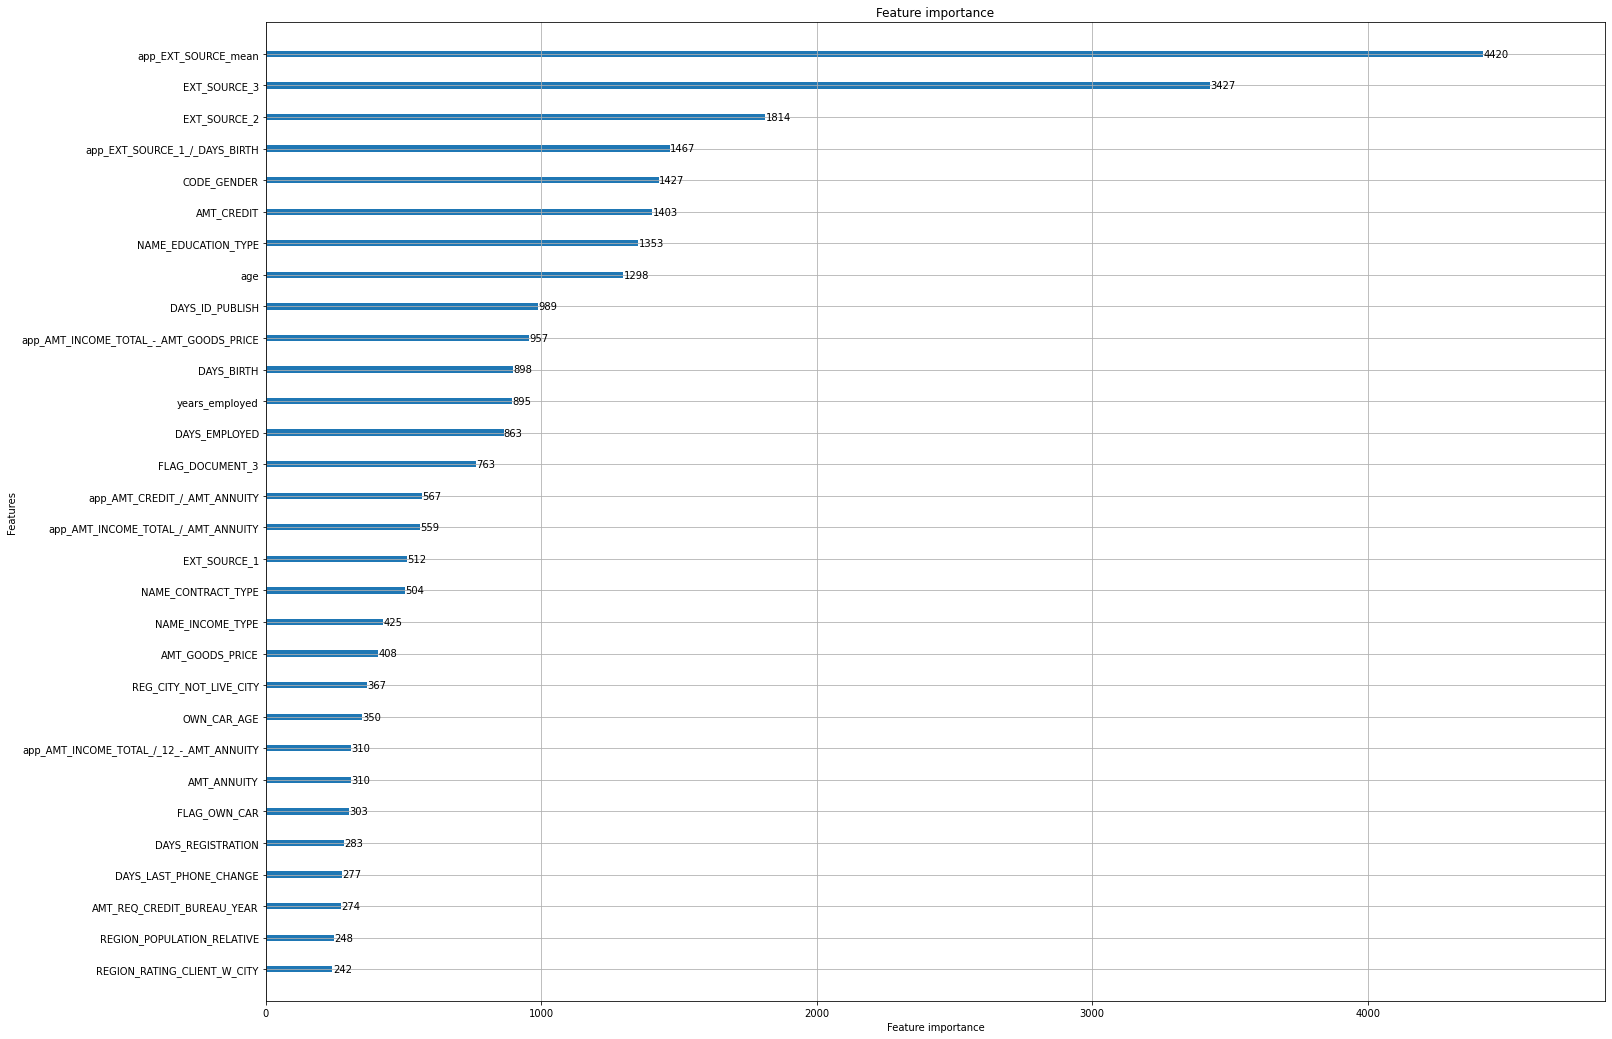

In [73]:
lgb.plot_importance(model, max_num_features=30, figsize=(24, 18))

In [74]:
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
params={'colsample_bytree': 0.8,
 'learning_rate': 0.01,
 'num_leaves': 34,
 'subsample': 0.97,
 'max_depth': 8,
 'reg_alpha': 0.03,
 'reg_lambda': 0.07,
 'min_split_gain': 0.01,
 #'min_child_weight': 38
       }
prediction = np.zeros(X_test.shape[0])
for n_fold, (train_idx, valid_idx) in enumerate(folds.split(X, y)):
        train_x, train_y = X.iloc[train_idx], y.iloc[train_idx]
        valid_x, valid_y = X.iloc[valid_idx], y.iloc[valid_idx]
        clf = lgb.LGBMClassifier(**params)
        clf.fit(train_x, train_y, 
                eval_set = [(train_x, train_y), (valid_x, valid_y)], eval_metric = 'auc', 
                verbose = 100, early_stopping_rounds = 50)
        prediction += clf.predict(X_test)

Training until validation scores don't improve for 50 rounds
[100]	training's auc: 0.746379	training's binary_logloss: 0.255388	valid_1's auc: 0.734783	valid_1's binary_logloss: 0.256905
Did not meet early stopping. Best iteration is:
[100]	training's auc: 0.746379	training's binary_logloss: 0.255388	valid_1's auc: 0.734783	valid_1's binary_logloss: 0.256905
Training until validation scores don't improve for 50 rounds
[100]	training's auc: 0.74568	training's binary_logloss: 0.255405	valid_1's auc: 0.739849	valid_1's binary_logloss: 0.257029
Did not meet early stopping. Best iteration is:
[100]	training's auc: 0.74568	training's binary_logloss: 0.255405	valid_1's auc: 0.739849	valid_1's binary_logloss: 0.257029
Training until validation scores don't improve for 50 rounds
[100]	training's auc: 0.745134	training's binary_logloss: 0.255592	valid_1's auc: 0.7442	valid_1's binary_logloss: 0.255743
Did not meet early stopping. Best iteration is:
[100]	training's auc: 0.745134	training's binar

In [75]:
sub = test[['SK_ID_CURR']].copy()
sub['TARGET'] = prediction / 10
sub.to_csv('sub.csv', index= False)

This was EDA and basic feature engineering. I know that feature engineering and modelling could be much better, but decided to make EDA the main focus of this kernel. I'll do better feature engineering and modelling in the next one.